In [1]:
import numpy as np
from numpy import *
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
from matplotlib import *
import random

In [2]:
#导入数据
train = load_svmlight_file("a9a.txt")
validation = load_svmlight_file('a9a.t', n_features=123)

X_train = train[0].toarray()
y_train = train[1].reshape(X_train.shape[0], 1)

X_validation = validation[0].toarray()
y_validation = validation[1].reshape(X_validation.shape[0], 1)

X_train = concatenate((ones((X_train.shape[0], 1), dtype='float'), X_train), axis=1)
X_validation = concatenate((ones((X_validation.shape[0], 1), dtype='float'), X_validation), axis=1)

In [3]:
Y_train=y_train
for i in range(Y_train.size):
    if Y_train[i]==-1:
        Y_train[i]=0
Y_validation=y_validation
for i in range(Y_validation.size):
    if y_validation[i]==-1:
        Y_validation[i]=0

In [4]:
def sigmoid(x): 
    return 1/(1 + exp(-x)) 

In [5]:
def loss(x, y, w):
    return -(dot(y.T,log(sigmoid(x.dot(w)))) + (1 - y).T.dot(log(1 - sigmoid(x.dot(w)))))[0]

In [6]:
def NAG(xt,yt,xv,yv,w,eta,times,batch_size,gamma):
    v = zeros((xt.shape[1], 1))
    LNAG = []
    for i in range(times):
        sample_index = random.sample(list(arange(0,yt.size)),batch_size)
        x = xt[sample_index, :]
        y = yt[sample_index, :]
        LNAG.append(loss(xv, yv, w) / yv.size)
        g = x.T.dot(sigmoid(np.dot(x, w - gamma * v)) - y) / y.size
        v = gamma * v +eta*g
        w = w - v
    return LNAG

In [7]:
w=zeros((X_train.shape[1], 1)) #参数全零初始化
eta=0.01  #学习率
times=1000  #学习次数
L_NAG=NAG(X_train,Y_train,X_validation,Y_validation,w,eta,times,5000,0.9)

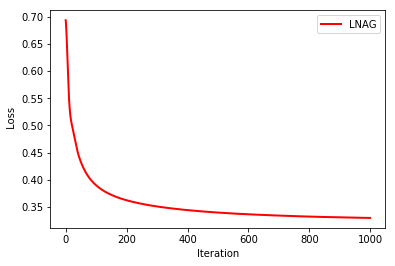

In [8]:
count=arange(0,len(L_NAG))
x = count
y = L_NAG
plt.plot(x,y,"r-",linewidth=2,label='LNAG')
plt . ylabel (" Loss"  )  
plt . xlabel ("Iteration"  )      
plt.legend()  
plt.show()  

In [9]:
def RMSProp(xt, yt, xv, yv,w,eta,times,batch_size,gamma,epsilon):
    G = zeros((xt.shape[1], 1))
    LRMSProp = []
    for i in range(times):
        sample_index = random.sample(list(np.arange(0, yt.size)), batch_size)
        x = xt[sample_index, :]
        y = yt[sample_index, :]
        LRMSProp.append(loss(xv, yv, w) / yv.size)
        g = x.T.dot(sigmoid(dot(x, w)) - y) / y.size
        G = gamma * G + (1 - gamma) * g * g
        w = w - eta/sqrt(G + epsilon) * g
    return LRMSProp

In [10]:
w=zeros((X_train.shape[1], 1))
alpha=0.01  #学习率
times=1000  #学习次数
L_RMSProp=RMSProp(X_train,Y_train,X_validation,Y_validation,w,alpha,times,5000,0.9,1e-8)

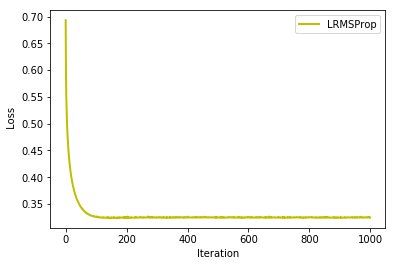

In [11]:
count=arange(0,len(L_RMSProp))
x = count
y=L_RMSProp
plt.plot(x,y,"y-",linewidth=2,label='LRMSProp')
plt . ylabel (" Loss"  )  
plt . xlabel ("Iteration"  )      
plt.legend()  
plt.show()  

In [12]:
def AdaDelta(xt,yt,xv,yv,w,times,batch_size,gamma,epsilon):
    delta = zeros((xt.shape[1], 1))
    G = zeros((xt.shape[1], 1))
    LAdaDelta = []
    for i in range(times):
        sample_index = random.sample(list(arange(0, yt.size)), batch_size)
        x = xt[sample_index, :]
        y = yt[sample_index, :]
        LAdaDelta.append(loss(xv, yv,w) / yv.size)
        g = x.T.dot(sigmoid(np.dot(x,w)) - y) / y.size
        G = gamma * G + (1 - gamma) * g * g
        delta_w = -sqrt(delta + epsilon)/sqrt(G + epsilon) * g
        w = w+ delta_w
        delta = gamma * delta + (1 - gamma) * delta_w * delta_w
    return  LAdaDelta

In [13]:
w=zeros((X_train.shape[1], 1))
times=1000  #学习次数
L_AdaDelta=AdaDelta(X_train,Y_train,X_validation,Y_validation,w,times,5000,0.95,1e-8)

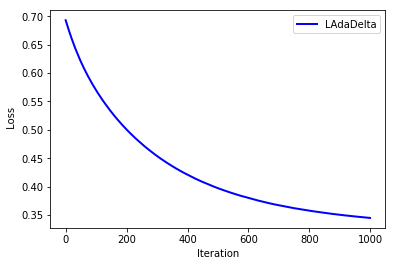

In [14]:
count=arange(0,len(L_AdaDelta))
x = count
y=L_AdaDelta
plt.plot(x,y,"b-",linewidth=2,label='LAdaDelta')
plt . ylabel (" Loss"  )  
plt . xlabel ("Iteration"  )      
plt.legend()  
plt.show()  

In [15]:
def Adam(xt,yt,xv,yv,w,eta,times,batch_size,beta,gamma,epsilon):
    G = zeros((xt.shape[1], 1))
    moments = zeros((xt.shape[1], 1))
    LAdam = []
    for i in range(times):
        sample_index = random.sample(list(arange(0, yt.size)), batch_size)
        x = xt[sample_index, :]
        y = yt[sample_index, :]
        LAdam.append(loss(xv, yv,w) / yv.size)
        g = x.T.dot(sigmoid(np.dot(x, w)) - y) / y.size
        moments = beta * moments + (1.0 - beta) * g
        G = gamma * G + (1.0 - gamma) * g * g
        alpha = eta *sqrt(1.0 - gamma**(i + 1)) / (1.0 - beta**(i + 1))
        w = w - alpha * moments / sqrt(G + epsilon)
    return LAdam

In [16]:
w=zeros((X_train.shape[1], 1)) #参数全零初始化
eta=0.01  #学习率
times=1000  #学习次数
L_Adam=Adam(X_train,Y_train,X_validation,Y_validation,w,eta,times,5000,0.9,0.95,1e-8)

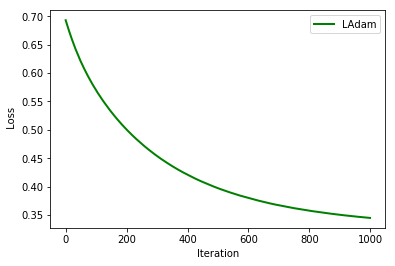

In [17]:
count=arange(0,len(L_NAG))
x = count
y4=L_Adam
plt.plot(x,y,"g-",linewidth=2,label='LAdam')
plt . ylabel (" Loss"  )  
plt . xlabel ("Iteration"  )      
plt.legend()  
plt.show()  

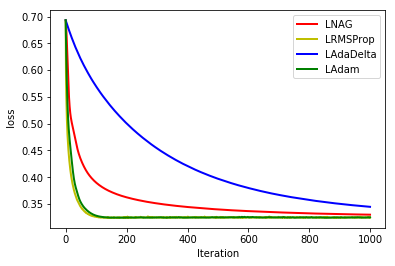

In [18]:
count=arange(0,1000)
x = count
y1 = L_NAG
y2=L_RMSProp
y3=L_AdaDelta
y4=L_Adam
plt.plot(x,y1,"r-",linewidth=2,label='LNAG')
plt.plot(x,y2,"y-",linewidth=2,label='LRMSProp')
plt.plot(x,y3,"b-",linewidth=2,label='LAdaDelta')
plt.plot(x,y4,"g-",linewidth=2,label='LAdam')
plt . ylabel (" loss"  )  
plt . xlabel ("Iteration"  )      
plt.legend()  
plt.show()  